## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0809 12:27:54.453819  9500 deprecation_wrapper.py:119] From c:\users\susan01\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0809 12:27:54.457789  9500 deprecation_wrapper.py:119] From c:\users\susan01\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0809 12:27:54.509831  9500 deprecation_wrapper.py:119] From c:\users\susan01\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0809 12:27:54.509831  9500 deprecation_wrapper.py:119] From c:\users\susan01\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backe

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 151us/step - loss: 5.9997 - acc: 0.2780 - val_loss: 5.8004 - val_acc: 0.3485
Epoch 2/50
50000/50000 [==============================] - 8s 161us/step - loss: 5.7175 - acc: 0.3679 - val_loss: 5.6430 - val_acc: 0.3795
Epoch 3/50
50000/50000 [==============================] - 8s 150us/step - loss: 5.5727 - acc: 0.3969 - val_loss: 5.5126 - val_acc: 0.4000
Epoch 4/50
50000/50000 [==============================] - 7s 148us/step - loss: 5.4518 - acc: 0.4147 - val_loss: 5.4013 - val_acc: 0.4221
Epoch 5/50
50000/50000 [==============================] - 8s 151us/step - loss: 5.3410 - acc: 0.4342 - val_loss: 5.2995 - val_acc: 0.4341
Epoch 6/50
50000/50000 [==============================] - 8s 151us/step - loss: 5.2408 - acc: 0.4444 - val_loss: 5.1925 - val_acc: 0.4505
Epoch 7/50
50000/50000 [==============================] - 8s 151us/step - loss: 5.1432 - acc: 0.4574 - val_loss: 5.1101 - 

Epoch 2/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.7914 - acc: 0.3691 - val_loss: 1.7481 - val_acc: 0.3803
Epoch 3/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.7101 - acc: 0.3981 - val_loss: 1.6826 - val_acc: 0.4163
Epoch 4/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.6528 - acc: 0.4192 - val_loss: 1.6345 - val_acc: 0.4264
Epoch 5/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.6051 - acc: 0.4376 - val_loss: 1.6023 - val_acc: 0.4302
Epoch 6/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.5664 - acc: 0.4519 - val_loss: 1.5682 - val_acc: 0.4484
Epoch 7/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.5346 - acc: 0.4629 - val_loss: 1.5356 - val_acc: 0.4528
Epoch 8/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.5060 - acc: 0.4708 - val_loss: 1.5119 - val_acc: 0.4657
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 7s 149us/step - loss: 1.7359 - acc: 0.3906 - val_loss: 1.7044 - val_acc: 0.4010
Epoch 4/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.6783 - acc: 0.4097 - val_loss: 1.6561 - val_acc: 0.4190
Epoch 5/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.6310 - acc: 0.4277 - val_loss: 1.6191 - val_acc: 0.4226
Epoch 6/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.5908 - acc: 0.4419 - val_loss: 1.5763 - val_acc: 0.4456
Epoch 7/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.5550 - acc: 0.4535 - val_loss: 1.5572 - val_acc: 0.4501
Epoch 8/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.5231 - acc: 0.4639 - val_loss: 1.5412 - val_acc: 0.4526
Epoch 9/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.4950 - acc: 0.4732 - val_loss: 1.5227 - val_acc: 0.4607
Epoch 10/50
50000/50000 [====================

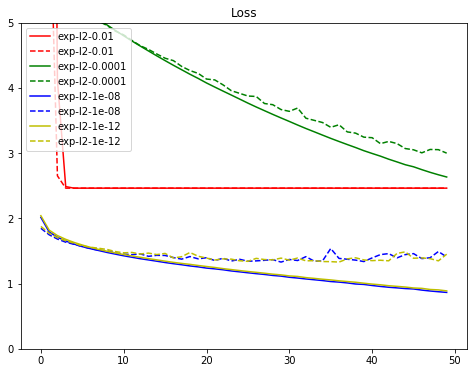

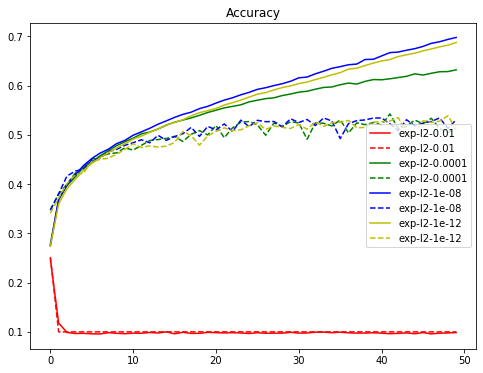

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [16]:
def build_mlp12(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [17]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L12_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [18]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L12_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp12(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1_l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 176us/step - loss: 18.7901 - acc: 0.2747 - val_loss: 17.3458 - val_acc: 0.3370
Epoch 2/50
50000/50000 [==============================] - 8s 170us/step - loss: 16.1341 - acc: 0.3570 - val_loss: 14.9693 - val_acc: 0.3664
Epoch 3/50
50000/50000 [==============================] - 8s 167us/step - loss: 13.9483 - acc: 0.3811 - val_loss: 12.9690 - val_acc: 0.3930
Epoch 4/50
50000/50000 [==============================] - 8s 168us/step - loss: 12.1004 - acc: 0.3928 - val_loss: 11.2662 - val_acc: 0.4026
Epoch 5/50
50000/50000 [==============================] - 8s 166us/step - loss: 10.5296 - acc: 0.4024 - val_loss: 9.8189 - val_acc: 0.4099
Epoch 6/50
50000/50000 [==============================] - 8s 166us/step - loss: 9.1938 - acc: 0.4094 - val_loss: 8.5877 - val_acc: 0.4117
Epoch 7/50
50000/50000 [==============================] - 8s 168us/step - loss: 8.0563 - acc: 0.4138 - val_loss: 

Epoch 2/50
50000/50000 [==============================] - 8s 164us/step - loss: 13.0250 - acc: 0.3601 - val_loss: 12.1322 - val_acc: 0.3761
Epoch 3/50
50000/50000 [==============================] - 8s 166us/step - loss: 11.3528 - acc: 0.3831 - val_loss: 10.6059 - val_acc: 0.3835
Epoch 4/50
50000/50000 [==============================] - 8s 165us/step - loss: 9.9407 - acc: 0.3981 - val_loss: 9.3025 - val_acc: 0.4012
Epoch 5/50
50000/50000 [==============================] - 8s 165us/step - loss: 8.7401 - acc: 0.4068 - val_loss: 8.2139 - val_acc: 0.4047
Epoch 6/50
50000/50000 [==============================] - 8s 167us/step - loss: 7.7165 - acc: 0.4164 - val_loss: 7.2514 - val_acc: 0.4145
Epoch 7/50
50000/50000 [==============================] - 8s 166us/step - loss: 6.8440 - acc: 0.4201 - val_loss: 6.4463 - val_acc: 0.4266
Epoch 8/50
50000/50000 [==============================] - 8s 164us/step - loss: 6.0967 - acc: 0.4284 - val_loss: 5.7582 - val_acc: 0.4317
Epoch 9/50
50000/50000 [======

50000/50000 [==============================] - 8s 166us/step - loss: 11.3424 - acc: 0.3823 - val_loss: 10.5958 - val_acc: 0.3911
Epoch 4/50
50000/50000 [==============================] - 8s 168us/step - loss: 9.9311 - acc: 0.3963 - val_loss: 9.2904 - val_acc: 0.3998
Epoch 5/50
50000/50000 [==============================] - 8s 166us/step - loss: 8.7298 - acc: 0.4063 - val_loss: 8.1863 - val_acc: 0.4126
Epoch 6/50
50000/50000 [==============================] - 9s 170us/step - loss: 7.7077 - acc: 0.4136 - val_loss: 7.2420 - val_acc: 0.4192
Epoch 7/50
50000/50000 [==============================] - 8s 167us/step - loss: 6.8338 - acc: 0.4224 - val_loss: 6.4448 - val_acc: 0.4243
Epoch 8/50
50000/50000 [==============================] - 8s 165us/step - loss: 6.0914 - acc: 0.4268 - val_loss: 5.7546 - val_acc: 0.4302
Epoch 9/50
50000/50000 [==============================] - 8s 168us/step - loss: 5.4552 - acc: 0.4330 - val_loss: 5.1690 - val_acc: 0.4325
Epoch 10/50
50000/50000 [==================

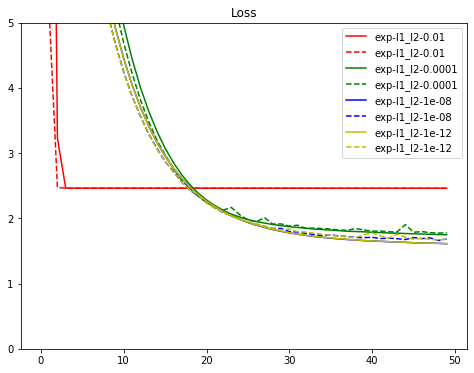

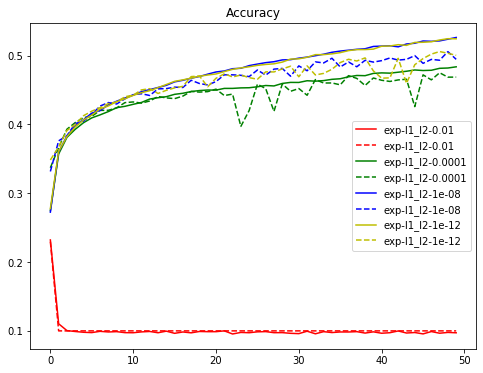

In [19]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()